# ML T

## pre process

In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
import spacy
from tqdm import tqdm
import copy
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/translate_tamil.csv
!wget https://raw.githubusercontent.com/Natkeeran/automated_tamil_text_classification/master/data/TamilNLP_TamilStopWords.txt
!wget https://raw.githubusercontent.com/Natkeeran/automated_tamil_text_classification/master/data/custom_tamil_stop_words.txt


--2023-10-27 12:36:43--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/translate_tamil.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13105123 (12M) [text/plain]
Saving to: ‘translate_tamil.csv’

translate_tamil.csv 100%[===================>]  12.50M  --.-KB/s    in 0.1s    

2023-10-27 12:36:44 (103 MB/s) - ‘translate_tamil.csv’ saved [13105123/13105123]

--2023-10-27 12:36:44--  https://raw.githubusercontent.com/Natkeeran/automated_tamil_text_classification/master/data/TamilNLP_TamilStopWords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

In [3]:
data = pd.read_csv("/content/translate_tamil.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

In [4]:
data.head()

,Unnamed: 0,text,category,Length,Word_count,mean_word_length,mean_sent_length,isenglish,translate
0,0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000,72.0,False,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...
1,1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0,True,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...
2,2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000,68.0,False,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...
3,3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333,91.0,False,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...
4,4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0,True,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38214 entries, 0 to 38213
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        38214 non-null  int64  
 1   text              38214 non-null  object 
 2   category          38214 non-null  object 
 3   Length            38214 non-null  int64  
 4   Word_count        38214 non-null  int64  
 5   mean_word_length  38214 non-null  float64
 6   mean_sent_length  38214 non-null  float64
 7   isenglish         38214 non-null  bool   
 8   translate         38214 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 2.4+ MB


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
def take_data_to_shower(tweet):
    tweet=str(tweet)

    noises = ['URL', '@USER', '\'ve', 'n\'t', '\'s', '\'m']

    for noise in noises:
        tweet = tweet.replace(noise, '')

    return tweet

In [8]:
def remove_emoticon(text):
        text=str(text)

        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

In [9]:
def remove_punc(text):
    text=str(text)
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [10]:
def tokenize(tweet):
   tweet=str(tweet)
#
   lower_tweet = tweet.lower()
   return word_tokenize(lower_tweet)

In [11]:
def get_tamil_stop_words():
    swdf1 = pd.read_csv("TamilNLP_TamilStopWords.txt",  header=None)
    swdf2 = pd.read_csv("custom_tamil_stop_words.txt",  header=None)
    sw1 = swdf1[0].tolist()
    sw2 = swdf2[0].tolist()
    tamil_stop_words = list(set(sw1 + sw2))
    return tamil_stop_words

In [12]:
def remove_stop_words(tokens):
   clean_tokens = []
   newStopWords = get_tamil_stop_words()
#    newStopWords = [
#     "ஒரு", "இது", "அது", "அவர்", "நான்",
#     "நீங்கள்", "அவன்", "அவள்", "நமக்கு", "உங்களுக்கு",
#     "அவர்களுக்கு", "அவர்கள்", "அதில்", "இங்கு", "எப்போது",
#     "எப்படி", "என்னை", "உள்ள", "என்னுடைய", "உங்கள்",
#     "எமது", "இதை", "அந்த", "பொது", "மிகுந்த"
# ]
   stopWords = stopwords.words('english')
   stopWords.append(newStopWords)
  #  print(stopWords)

   for token in tokens:
       if token not in stopWords:
           if token.replace(' ', '') != '':
               if len(token) > 1:
                   clean_tokens.append(token)
   return ' '.join(clean_tokens)

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
##EMBEDDING##
def datacleen(data):
  tqdm.pandas(desc="Remove duplicates ")
  data.drop_duplicates(subset=['translate'], inplace=True)
  # tqdm.pandas(desc="To lower letter")
  # data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

  tqdm.pandas(desc="Cleaning Data Phase I...")
  data['take_data_to_shower'] = data['translate'].progress_apply(take_data_to_shower)

  tqdm.pandas(desc="removing emoji...")
  data['remove_emoticon'] = data['take_data_to_shower'].progress_apply(remove_emoticon)

  # tqdm.pandas(desc="Translate...")
  # data['translate'] = data['remove_emoticon'].progress_apply(translate_to_tamil)

  tqdm.pandas(desc="removing punctuation...")
  data['remove_punc'] = data['remove_emoticon'].progress_apply(remove_punc)



  tqdm.pandas(desc="Tokenizing Data...")
  data['tokenize'] = data['remove_punc'].progress_apply(tokenize)

  tqdm.pandas(desc="Cleaning Data Phase II...")
  data['remove_stop_words'] = data['tokenize'].progress_apply(remove_stop_words)

  # tqdm.pandas(desc="Cleaning Data Phase III...")

  # data.drop(data[(data['category'] == 'unknown_state') | (data['category'] == 'not-tamil') |(data['category'] == 'non-tamil') |  (data['category'] == 'mixed_feelings')].index, inplace=True)
  # data.drop(data[(data['category'] == 'mixed_feelings')].index, inplace=True)
  # replacement_dict = {
  #     'positive': 0,
  #     'negative': 1,
  #     'mixed_feelings':-1,
  # }
  # # Replace values in the DataFrame
  # data['category'].replace(replacement_dict, inplace=True)


  # stem_and_lem ---> outlet
  return data
  # text_vector = clean_texts['tokens'].tolist()


In [15]:
data = datacleen(data)
data

Cleaning Data Phase II...: 100%|██████████| 38152/38152 [02:38<00:00, 240.30it/s]


,Unnamed: 0,text,category,Length,Word_count,mean_word_length,mean_sent_length,isenglish,translate,take_data_to_shower,remove_emoticon,remove_punc,tokenize,remove_stop_words
0,0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000,72.0,False,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து தரமான சம...,"[வணக்கம், டா, மாப்ள, வேதாரண்யத்துலேருந்து, தரம...",வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து தரமான சம...
1,1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0,True,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,அப்ப 96 to 2016 வரைக்கும் ரஜினி அரசியலுக்கு வர...,"[அப்ப, 96, to, 2016, வரைக்கும், ரஜினி, அரசியலு...",அப்ப 96 2016 வரைக்கும் ரஜினி அரசியலுக்கு வருவே...
2,2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000,68.0,False,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,"[அருமை, எவதொட்டாலும், வெட்டுடா, அடிச்சா, திருப...",அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...
3,3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333,91.0,False,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,"[எங்கள், சாதியின், குல, தெய்வம், திரௌபதி, அம்ம...",எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அரு...
4,4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0,True,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,"[trailer, பார்த்துட்டு, ஆய்த, எழுத்து, சூர்யா,...",trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38209,38209,Yov padam vera lvl la hit aaga poguthu,NOT,38,8,3.875000,38.0,True,Yov padam vera lvl la ஹிட் ஆக போகுது,Yov padam vera lvl la ஹிட் ஆக போகுது,Yov padam vera lvl la ஹிட் ஆக போகுது,Yov padam vera lvl la ஹிட் ஆக போகுது,"[yov, padam, vera, lvl, la, ஹிட், ஆக, போகுது]",yov padam vera lvl la ஹிட் ஆக போகுது
38210,38210,Super star fans hit like waiting,NOT,33,6,4.500000,33.0,True,காத்திருப்பது போல் அதிர்ந்த சூப்பர் ஸ்டார் ரசி...,காத்திருப்பது போல் அதிர்ந்த சூப்பர் ஸ்டார் ரசி...,காத்திருப்பது போல் அதிர்ந்த சூப்பர் ஸ்டார் ரசி...,காத்திருப்பது போல் அதிர்ந்த சூப்பர் ஸ்டார் ரசி...,"[காத்திருப்பது, போல், அதிர்ந்த, சூப்பர், ஸ்டார...",காத்திருப்பது போல் அதிர்ந்த சூப்பர் ஸ்டார் ரசி...
38211,38211,Seems to be Hindi Film Ek Tha Tiger Remake..,OFF,44,9,4.000000,44.0,True,ஹிந்தி படம் ஏக் தா டைகர் ரீமேக்..,ஹிந்தி படம் ஏக் தா டைகர் ரீமேக்..,ஹிந்தி படம் ஏக் தா டைகர் ரீமேக்..,ஹிந்தி படம் ஏக் தா டைகர் ரீமேக்,"[ஹிந்தி, படம், ஏக், தா, டைகர், ரீமேக்]",ஹிந்தி படம் ஏக் தா டைகர் ரீமேக்
38212,38212,Apa idhulla sk van yarum illayada,OFF,33,6,4.666667,33.0,True,அபா இதுல்லா எஸ்.கே வான் யாரும் இலையாடா,அபா இதுல்லா எஸ்.கே வான் யாரும் இலையாடா,அபா இதுல்லா எஸ்.கே வான் யாரும் இலையாடா,அபா இதுல்லா எஸ்கே வான் யாரும் இலையாடா,"[அபா, இதுல்லா, எஸ்கே, வான், யாரும், இலையாடா]",அபா இதுல்லா எஸ்கே வான் யாரும் இலையாடா


## Split

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
x = data["remove_stop_words"]
y = data["category"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101, stratify=y )

## process

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def show_confusion_matrix(matrixs,Classifier_text):
  plt.figure(figsize=(8, 6))
  sns.heatmap(matrixs, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Confusion Matrix -{Classifier_text}')
  plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
def show_confusion_matrix(matrixs,Classifier_text):
  plt.figure(figsize=(8, 6))
  sns.heatmap(matrixs, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Confusion Matrix -{Classifier_text}')
  plt.show()

In [ ]:
# Define your Word2Vec model
def train_word2vec(sentences, vector_size=100, window=5, min_count=1, workers=4):
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

def document_vector(model, words):
    # Create a document vector by averaging word vectors
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

def perform_classification(feature_extraction_type, X_train, X_test, y_train, y_test):
    if feature_extraction_type == "BOW":
        vectorizer = CountVectorizer()
    elif feature_extraction_type == "TF-IDF":
        vectorizer = TfidfVectorizer()
    elif feature_extraction_type == "Word2Vec":
        # Train Word2Vec model on your training data
        sentences = [text.split() for text in X_train]
        w2v_model = train_word2vec(sentences)

    if feature_extraction_type == "Word2Vec":
        X_train_fs = np.array([document_vector(w2v_model, text.split()) for text in X_train])
        X_test_fs = np.array([document_vector(w2v_model, text.split()) for text in X_test])
    else:
        X_train_fs = vectorizer.fit_transform(X_train)
        X_test_fs = vectorizer.transform(X_test)

    classifiers = [
        ("Bernoulli NB", BernoulliNB()),
        ("SVM", SVC(kernel='linear')),
        ("Logistic Regression", LogisticRegression(max_iter=1000)),
        ("KNN", KNeighborsClassifier(n_neighbors=100)),
        ("RandomForest", RandomForestClassifier(n_estimators=100)),
        ("Decision Tree", DecisionTreeClassifier())
    ]

    for classifier_name, classifier in classifiers:
        classifier.fit(X_train_fs, y_train)
        train_predictions = classifier.predict(X_train_fs)
        train_accuracy = accuracy_score(y_train, train_predictions)

        predictions = classifier.predict(X_test_fs)
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions,zero_division =0)

        print(f"{classifier_name} Train Accuracy ({feature_extraction_type}): {train_accuracy:.2f}")
        print(f"{classifier_name} Test Accuracy ({feature_extraction_type}): {accuracy:.2f}")
        print(f"{classifier_name} Classification Report ({feature_extraction_type}):\n{report}")
        print(f"{classifier_name} Classification Report ({feature_extraction_type}):\n{confusion_matrix(y_test, predictions)}")
        # show_confusion_matrix(confusion_matrix(y_test, predictions),classifier_name)
        print(f"{classifier_name} Confusion Matrix ({feature_extraction_type})")
        print("\n\n")

In [ ]:
# Before add stop word
perform_classification("BOW",x_train, x_test, y_train, y_test)

Bernoulli NB Train Accuracy (BOW): 0.80
Bernoulli NB Test Accuracy (BOW): 0.78
Bernoulli NB Classification Report (BOW):
              precision    recall  f1-score   support

         NOT       0.80      0.95      0.86      9495
         OFF       0.61      0.25      0.36      3096

    accuracy                           0.78     12591
   macro avg       0.70      0.60      0.61     12591
weighted avg       0.75      0.78      0.74     12591

Bernoulli NB Classification Report (BOW):
[[8983  512]
 [2307  789]]
Bernoulli NB Confusion Matrix (BOW)



SVM Train Accuracy (BOW): 0.85
SVM Test Accuracy (BOW): 0.78
SVM Classification Report (BOW):
              precision    recall  f1-score   support

         NOT       0.80      0.95      0.86      9495
         OFF       0.61      0.25      0.36      3096

    accuracy                           0.78     12591
   macro avg       0.70      0.60      0.61     12591
weighted avg       0.75      0.78      0.74     12591

SVM Classification Repo

In [ ]:
# After Add stop word
perform_classification("TF-IDF",x_train, x_test, y_train, y_test)

Bernoulli NB Train Accuracy (TF-IDF): 0.80
Bernoulli NB Test Accuracy (TF-IDF): 0.78
Bernoulli NB Classification Report (TF-IDF):
              precision    recall  f1-score   support

         NOT       0.80      0.95      0.86      9495
         OFF       0.61      0.25      0.36      3096

    accuracy                           0.78     12591
   macro avg       0.70      0.60      0.61     12591
weighted avg       0.75      0.78      0.74     12591

Bernoulli NB Classification Report (TF-IDF):
[[8983  512]
 [2307  789]]
Bernoulli NB Confusion Matrix (TF-IDF)



SVM Train Accuracy (TF-IDF): 0.81
SVM Test Accuracy (TF-IDF): 0.78
SVM Classification Report (TF-IDF):
              precision    recall  f1-score   support

         NOT       0.79      0.96      0.87      9495
         OFF       0.65      0.21      0.31      3096

    accuracy                           0.78     12591
   macro avg       0.72      0.59      0.59     12591
weighted avg       0.75      0.78      0.73     12591


In [ ]:
# Call the function with the desired feature extraction method
perform_classification("Word2Vec", x_train, x_test, y_train, y_test)

Bernoulli NB Train Accuracy (Word2Vec): 0.65
Bernoulli NB Test Accuracy (Word2Vec): 0.65
Bernoulli NB Classification Report (Word2Vec):
              precision    recall  f1-score   support

         NOT       0.87      0.63      0.73      9495
         OFF       0.39      0.72      0.50      3096

    accuracy                           0.65     12591
   macro avg       0.63      0.67      0.62     12591
weighted avg       0.75      0.65      0.68     12591

Bernoulli NB Classification Report (Word2Vec):
[[5977 3518]
 [ 874 2222]]
Bernoulli NB Confusion Matrix (Word2Vec)



SVM Train Accuracy (Word2Vec): 0.75
SVM Test Accuracy (Word2Vec): 0.75
SVM Classification Report (Word2Vec):
              precision    recall  f1-score   support

         NOT       0.75      1.00      0.86      9495
         OFF       0.00      0.00      0.00      3096

    accuracy                           0.75     12591
   macro avg       0.38      0.50      0.43     12591
weighted avg       0.57      0.75     

## ROC

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import itertools
import time

In [18]:
def train_word2vec(sentences, vector_size=100, window=5, min_count=1, workers=4):
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

def document_vector(model, words):
    # Create a document vector by averaging word vectors
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)
# Map your labels to binary (0 and 1)
result={
    "dataset":"Plain dataset",
    "output":[]
}
def perform_classification_with_roc(feature_extraction_type, X_train, X_test, y_train, y_test):
    label_mapping = {'NOT': 0, 'OFF': 1}
    y_test_binary = y_test.map(label_mapping)
    plt.figure(figsize=(20, 16))
    colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink', 'brown', 'teal'])
    for feature_extraction in feature_extraction_type:
        print("\n")
        print("-"*100)
        if feature_extraction == "BOW":
            vectorizer = CountVectorizer()
        elif feature_extraction == "TF-IDF":
            vectorizer = TfidfVectorizer()
        elif feature_extraction == "Word2Vec":
            # Train Word2Vec model on your training data
            sentences = [text.split() for text in X_train]
            w2v_model = train_word2vec(sentences)

        if feature_extraction == "Word2Vec":
            X_train_fs = np.array([document_vector(w2v_model, text.split()) for text in X_train])
            X_test_fs = np.array([document_vector(w2v_model, text.split()) for text in X_test])
        else:
            X_train_fs = vectorizer.fit_transform(X_train)
            X_test_fs = vectorizer.transform(X_test)
        classifiers = [
            ("Bernoulli NB", BernoulliNB()),
            ("SVM", SVC(kernel='linear', probability=True)),  # Enable probability estimates
            ("Logistic Regression", LogisticRegression(max_iter=1000)),
            ("KNN", KNeighborsClassifier(n_neighbors=100))
        ]
        result_feature_extraction = {"feature_extraction":feature_extraction,"reports":[]}
        for classifier_name, classifier in classifiers:
            print("\n")
            print("="*100)
            start_time = time.time()
            classifier.fit(X_train_fs, y_train)
            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{classifier_name} ({feature_extraction}) took {elapsed_time:.2f} seconds to complete.")


            train_predictions = classifier.predict(X_train_fs)
            train_accuracy = accuracy_score(y_train, train_predictions)

            predictions = classifier.predict(X_test_fs)
            accuracy = accuracy_score(y_test, predictions)
            report = classification_report(y_test, predictions, zero_division=0)
            kappa = cohen_kappa_score(y_test, predictions)

            print(f"{classifier_name} Train Accuracy ({feature_extraction}): {train_accuracy:.2f}")
            print(f"{classifier_name} Test Accuracy ({feature_extraction}): {accuracy:.2f}")
            print(f"{classifier_name} Kappa ({feature_extraction}): {kappa:.2f}")
            print(f"{classifier_name} Confusion Matrix ({feature_extraction}):\n{confusion_matrix(y_test, predictions)}")
            print(f"{classifier_name} Classification Report ({feature_extraction}):\n{report}")

            if hasattr(classifier, "predict_proba"):
                y_scores = classifier.predict_proba(X_test_fs)[:, 1]
            else:
                y_scores = classifier.decision_function(X_test_fs)

            fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
            roc_auc = auc(fpr, tpr)
            fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
            roc_auc = auc(fpr, tpr)
            color = next(colors)
            # Plot the ROC curve with a label for the classifier
            plt.plot(fpr, tpr, color, label=f'{classifier_name} ({feature_extraction}) - AUC = {roc_auc:.2f}')
            output = {
                "classifier_name":classifier_name,
                "train_accuracy":train_accuracy,
                "accuracy":accuracy,
                "report":report,
                "kappa":kappa,
                "fpr":fpr.tolist(),
                "tpr":tpr.tolist(),
                "thresholds":thresholds.tolist(),
                "auc":roc_auc,
                "confusion_matrix":(confusion_matrix(y_test, predictions).tolist())
            }
            result_feature_extraction["reports"].append(output)
        result["output"].append(result_feature_extraction)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {feature_extraction_types} with Different Classifiers')
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()




----------------------------------------------------------------------------------------------------


Bernoulli NB (BOW) took 0.08 seconds to complete.
Bernoulli NB Train Accuracy (BOW): 0.80
Bernoulli NB Test Accuracy (BOW): 0.78
Bernoulli NB Kappa (BOW): 0.25
Bernoulli NB Confusion Matrix (BOW):
[[8983  512]
 [2307  789]]
Bernoulli NB Classification Report (BOW):
              precision    recall  f1-score   support

         NOT       0.80      0.95      0.86      9495
         OFF       0.61      0.25      0.36      3096

    accuracy                           0.78     12591
   macro avg       0.70      0.60      0.61     12591
weighted avg       0.75      0.78      0.74     12591



SVM (BOW) took 785.72 seconds to complete.
SVM Train Accuracy (BOW): 0.85
SVM Test Accuracy (BOW): 0.78
SVM Kappa (BOW): 0.25
SVM Confusion Matrix (BOW):
[[8988  507]
 [2317  779]]
SVM Classification Report (BOW):
              precision    recall  f1-score   support

         NOT       0.80      0.

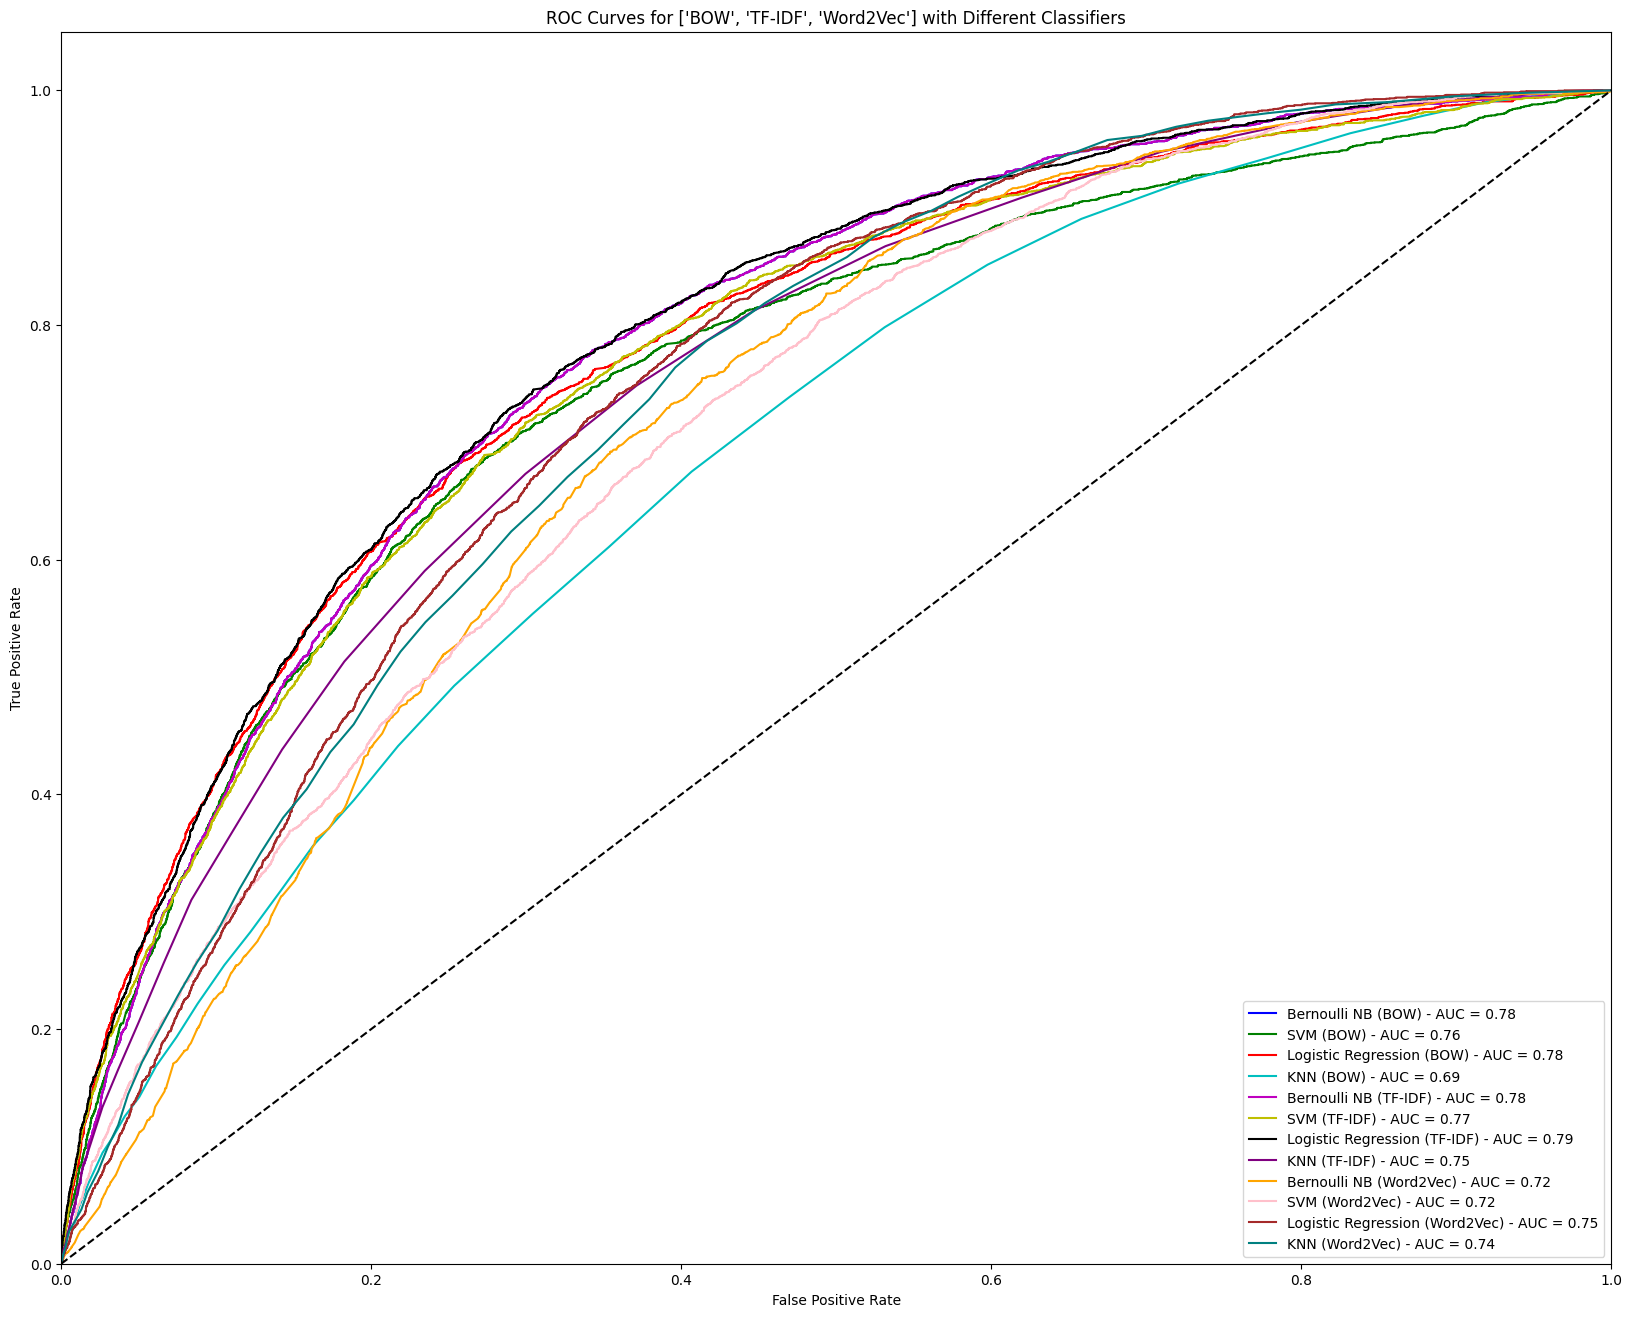

In [19]:
# Create ROC curves for each feature extraction method
feature_extraction_types = ["BOW", "TF-IDF", "Word2Vec"]
perform_classification_with_roc(feature_extraction_types, x_train, x_test, y_train, y_test)


In [22]:
with open('result.json', 'w') as json_file:
    json.dump(result, json_file)
result

{'dataset': 'Plain dataset',
 'output': [{'feature_extraction': 'BOW',
   'reports': [{'classifier_name': 'Bernoulli NB',
     'train_accuracy': 0.804154767027894,
     'accuracy': 0.7761099197839727,
     'report': '              precision    recall  f1-score   support\n\n         NOT       0.80      0.95      0.86      9495\n         OFF       0.61      0.25      0.36      3096\n\n    accuracy                           0.78     12591\n   macro avg       0.70      0.60      0.61     12591\nweighted avg       0.75      0.78      0.74     12591\n',
     'kappa': 0.249706115405945,
     'fpr': [0.0,
      0.0,
      0.0,
      0.00010531858873091101,
      0.00010531858873091101,
      0.00042127435492364404,
      0.00042127435492364404,
      0.000526592943654555,
      0.000526592943654555,
      0.000631911532385466,
      0.000631911532385466,
      0.0007372301211163771,
      0.0007372301211163771,
      0.0008425487098472881,
      0.0008425487098472881,
      0.00094786729857819



----------------------------------------------------------------------------------------------------


Bernoulli NB (BOW) took 0.00 seconds to complete.
Bernoulli NB Train Accuracy (BOW): 0.84
Bernoulli NB Test Accuracy (BOW): 0.82
Bernoulli NB Kappa (BOW): 0.00
Bernoulli NB Confusion Matrix (BOW):
[[41  0]
 [ 9  0]]
Bernoulli NB Classification Report (BOW):
              precision    recall  f1-score   support

         NOT       0.82      1.00      0.90        41
         OFF       0.00      0.00      0.00         9

    accuracy                           0.82        50
   macro avg       0.41      0.50      0.45        50
weighted avg       0.67      0.82      0.74        50



SVM (BOW) took 0.12 seconds to complete.
SVM Train Accuracy (BOW): 1.00
SVM Test Accuracy (BOW): 0.80
SVM Kappa (BOW): 0.18
SVM Confusion Matrix (BOW):
[[38  3]
 [ 7  2]]
SVM Classification Report (BOW):
              precision    recall  f1-score   support

         NOT       0.84      0.93      0.88      

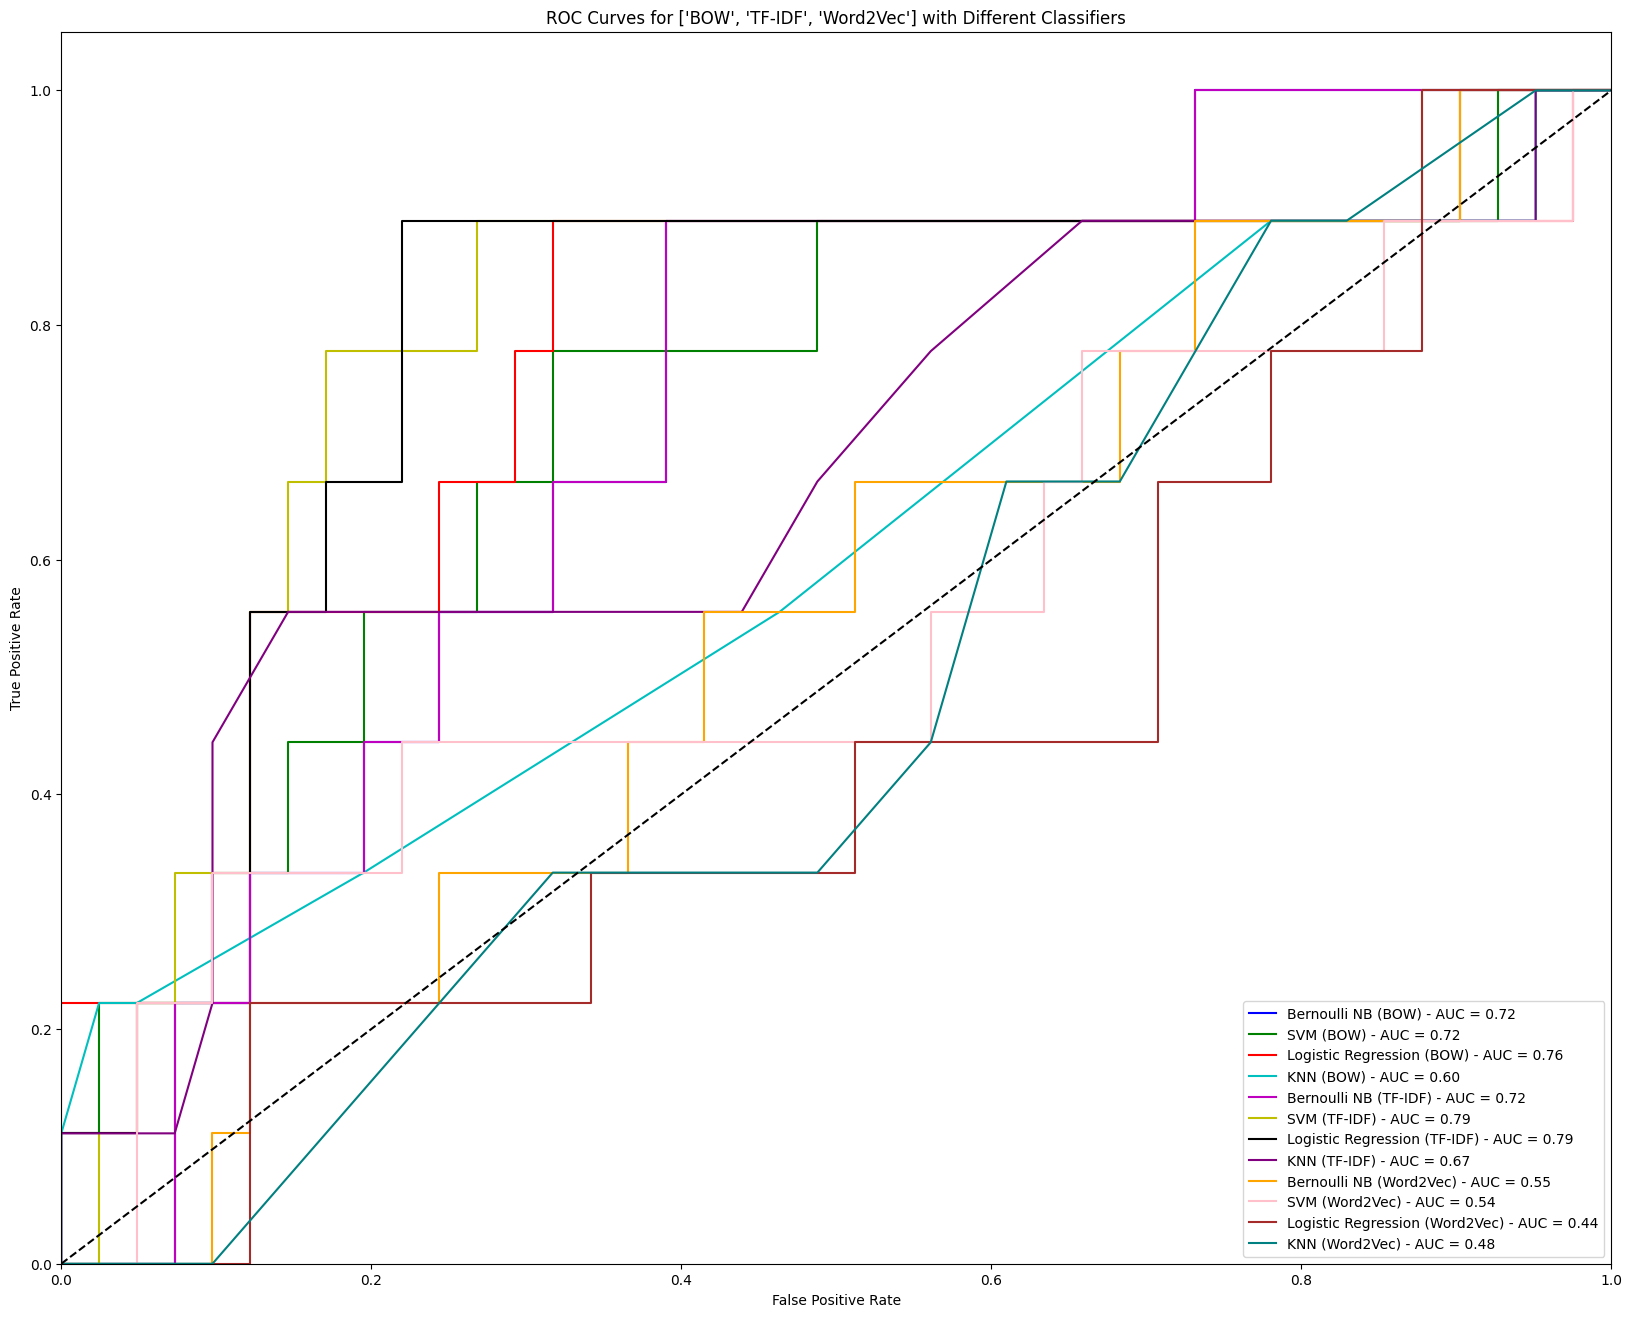

In [ ]:
X_train_10 = x_train[:500]
X_test_10 = x_test[:50]
y_train_10 = y_train[:500]
y_test_10 = y_test[:50]

# Enable multi-threading for Word2Vec training by setting the 'workers' parameter
feature_extraction_types = ["BOW", "TF-IDF", "Word2Vec"]
perform_classification_with_roc(feature_extraction_types, X_train_10, X_test_10, y_train_10, y_test_10)